In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras import datasets, layers, models

In [3]:
(training_images, training_labels),(testing_images, testing_labels)= datasets.cifar10.load_data()

In [4]:
training_images , testing_images = training_images/255, testing_images/255

In [5]:
class_names =['Plane','Car','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']

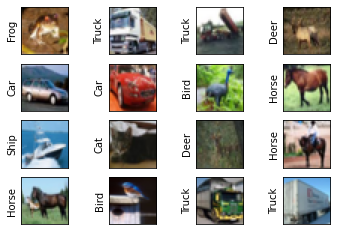

In [6]:
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(training_images[i])
    plt.xticks([])
    plt.yticks([])
    plt.ylabel(class_names[training_labels[i][0]])
    
plt.show()

In [7]:
training_images = training_images[:20000]
training_labels = training_labels[:20000]
testing_images = testing_images[:4000]
testing_labels = testing_labels[:4000]

In [8]:
model = models.Sequential()

In [9]:
model.add(layers.Conv2D(32,(3,3), activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [11]:
model.fit(training_images, training_labels, epochs=10, validation_data=(testing_images, testing_labels))

Epoch 1/10
625/625 [==============================] - 11s 17ms/step - loss: 1.7620 - accuracy: 0.3524 - val_loss: 1.5982 - val_accuracy: 0.4238
Epoch 2/10
625/625 [==============================] - 11s 18ms/step - loss: 1.4318 - accuracy: 0.4794 - val_loss: 1.4279 - val_accuracy: 0.4708
Epoch 3/10
625/625 [==============================] - 11s 18ms/step - loss: 1.2723 - accuracy: 0.5428 - val_loss: 1.2873 - val_accuracy: 0.5315
Epoch 4/10
625/625 [==============================] - 11s 18ms/step - loss: 1.1562 - accuracy: 0.5889 - val_loss: 1.2006 - val_accuracy: 0.5745
Epoch 5/10
625/625 [==============================] - 11s 18ms/step - loss: 1.0690 - accuracy: 0.6192 - val_loss: 1.1219 - val_accuracy: 0.6008
Epoch 6/10
625/625 [==============================] - 13s 20ms/step - loss: 0.9849 - accuracy: 0.6510 - val_loss: 1.1225 - val_accuracy: 0.6085
Epoch 7/10
625/625 [==============================] - 12s 19ms/step - loss: 0.9252 - accuracy: 0.6733 - val_loss: 1.0449 - val_accuracy:

In [13]:
loss, accuracy = model.evaluate(testing_images,testing_labels)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

model.save("image_class.model")

125/125 [==============================] - 1s 5ms/step - loss: 1.0562 - accuracy: 0.6453
Loss: 1.0561784505844116
Accuracy: 0.6452500224113464
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: image_class.model\assets


In [14]:
model=models.load_model('image_class.model')

Prediction is: Plane


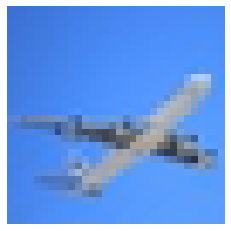

In [28]:
img = cv.imread('.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(img, cmap=plt.cm.binary)
plt.axis("off")

prediction = model.predict(np.array([img]) / 255)
index = np.argmax(prediction)
print(f'Prediction is: {class_names[index]}')